<a href="https://colab.research.google.com/github/MJKhadeeja/ML-python-Projects/blob/Random-Forest/RF(Reg)agricultural_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
from google.colab import files
files.upload()

Saving agricultural_yield_test.csv to agricultural_yield_test.csv


{'agricultural_yield_test.csv': b'Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare\n93.30472076220141,0,132.5222176089096,96.67092180524013,602.3862371830157,3,278.9865634507636\n83.67465323517892,1,57.283997062155905,99.00755589090961,466.51825061329794,8,836.4348404339313\n65.96303292087656,1,227.89547903206733,104.84427230130204,510.3204954871706,4,785.8817872406772\n78.6928343419941,1,176.31412646519567,90.13619142726779,354.3509138608812,5,807.8845255239556\n72.41568444802135,1,160.07041843888925,101.22166820906347,443.99378753681185,10,1064.5423739926212\n62.697082129751294,1,268.43939230533,99.97070954318944,485.22305557024,8,1003.2294104429473\n92.94284547818255,1,271.48875489157376,97.32805072723787,447.40357429028336,2,758.7169156453754\n75.51871560185674,1,84.04746531680979,94.75341144836283,690.5719976084528,3,541.1774872649454\n93.67381587620807,1,79.38603886631572,97.55854290021595,674.7335451115821

In [ ]:
agri_data=pd.read_csv('agricultural_yield_test.csv')
agri_data

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374
...,...,...,...,...,...,...,...
3995,95.094714,1,124.108262,98.970659,496.705800,5,802.209345
3996,53.256984,0,100.310322,111.448947,667.056391,8,509.646540
3997,94.145522,1,196.473704,110.003474,458.241408,3,776.013634
3998,61.452120,1,80.618357,97.815517,778.652540,4,502.319484


In [ ]:
agri_data.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [ ]:
agri_data.tail()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
3995,95.094714,1,124.108262,98.970659,496.705800,5,802.209345
3996,53.256984,0,100.310322,111.448947,667.056391,8,509.646540
3997,94.145522,1,196.473704,110.003474,458.241408,3,776.013634
3998,61.452120,1,80.618357,97.815517,778.652540,4,502.319484
3999,55.195906,0,122.473239,90.311720,582.999003,4,257.032544


In [ ]:
agri_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Soil_Quality                      4000 non-null   float64
 1   Seed_Variety                      4000 non-null   int64  
 2   Fertilizer_Amount_kg_per_hectare  4000 non-null   float64
 3   Sunny_Days                        4000 non-null   float64
 4   Rainfall_mm                       4000 non-null   float64
 5   Irrigation_Schedule               4000 non-null   int64  
 6   Yield_kg_per_hectare              4000 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 218.9 KB


In [ ]:
agri_data.describe()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
count,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,74.924952,0.70375,173.447166,99.841525,502.246625,4.977500,709.167849
std,14.496298,0.45666,72.298671,9.888547,99.222767,2.259816,199.497621
min,50.003622,0.00000,50.062655,66.724469,102.007518,0.000000,108.252421
25%,62.380142,0.00000,108.734463,93.101146,435.810131,3.000000,576.382146
50%,74.630855,1.00000,175.596395,99.762840,502.877959,5.000000,722.532738
75%,87.792071,1.00000,235.200606,106.447769,568.249383,6.000000,847.814106
max,99.998898,1.00000,299.992054,138.520202,876.694217,15.000000,1406.110705


In [ ]:
agri_data.shape

(4000, 7)

In [ ]:
agri_data.isnull().sum()

Soil_Quality                        0
Seed_Variety                        0
Fertilizer_Amount_kg_per_hectare    0
Sunny_Days                          0
Rainfall_mm                         0
Irrigation_Schedule                 0
Yield_kg_per_hectare                0
dtype: int64

In [ ]:
correlation=agri_data.corr()

<Axes: >

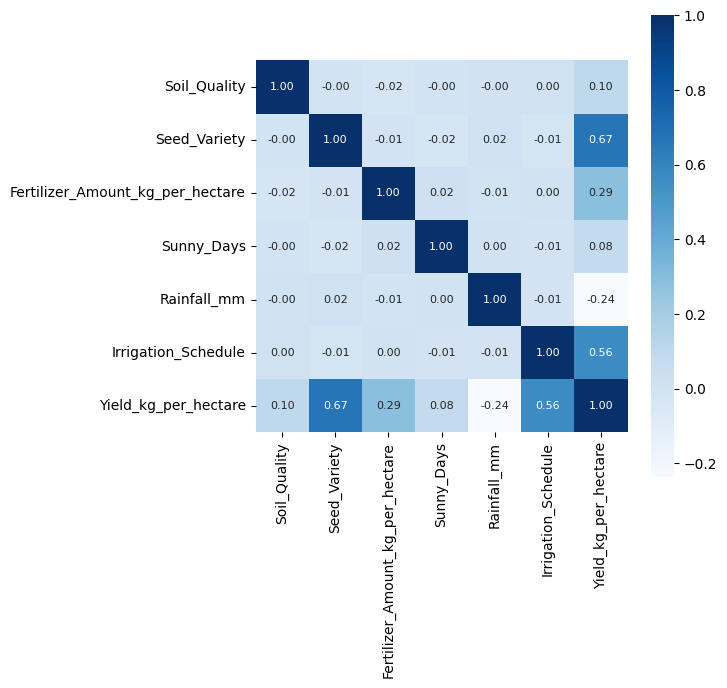

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
x=agri_data.drop(columns=['Yield_kg_per_hectare'],axis=1)
y=agri_data['Yield_kg_per_hectare']

In [ ]:
print(x)

      Soil_Quality  Seed_Variety  Fertilizer_Amount_kg_per_hectare  \
0        93.304721             0                        132.522218   
1        83.674653             1                         57.283997   
2        65.963033             1                        227.895479   
3        78.692834             1                        176.314126   
4        72.415684             1                        160.070418   
...            ...           ...                               ...   
3995     95.094714             1                        124.108262   
3996     53.256984             0                        100.310322   
3997     94.145522             1                        196.473704   
3998     61.452120             1                         80.618357   
3999     55.195906             0                        122.473239   

      Sunny_Days  Rainfall_mm  Irrigation_Schedule  
0      96.670922   602.386237                    3  
1      99.007556   466.518251                    8  


In [ ]:
print(y)

0        278.986563
1        836.434840
2        785.881787
3        807.884526
4       1064.542374
           ...     
3995     802.209345
3996     509.646540
3997     776.013634
3998     502.319484
3999     257.032544
Name: Yield_kg_per_hectare, Length: 4000, dtype: float64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(4000, 6) (3200, 6) (800, 6)


In [ ]:
print(x_train)

      Soil_Quality  Seed_Variety  Fertilizer_Amount_kg_per_hectare  \
1617     90.081046             0                        221.723284   
3157     93.703278             1                        153.586675   
2960     65.684753             1                        186.665020   
1189     50.737504             0                        153.163132   
2676     71.653872             0                         52.851552   
...            ...           ...                               ...   
3606     51.989165             1                        205.179695   
1608     89.726551             1                        265.113806   
2541     72.072269             0                        153.640564   
2575     70.818361             1                        231.023264   
3240     87.327352             0                        165.445937   

      Sunny_Days  Rainfall_mm  Irrigation_Schedule  
1617   99.532100   430.568361                    5  
3157   97.325682   567.629759                    7  


In [ ]:
print(y_train)

1617     611.606004
3157     845.222506
2960     575.497357
1189     363.008210
2676     467.306818
           ...     
3606     732.746409
1608    1142.505036
2541     482.936075
2575    1011.341505
3240     266.563013
Name: Yield_kg_per_hectare, Length: 3200, dtype: float64


In [ ]:
model=RandomForestRegressor(n_estimators=100)
RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
x_train_predict=model.predict(x_train)
train_data_accuracy=metrics.r2_score(y_train,x_train_predict)

In [ ]:
print('train data accuracy is',train_data_accuracy)

train data accuracy is 0.9881796728022458


In [ ]:
x_test_prediction=model.predict(x_test)
test_data_accuracy=metrics.r2_score(y_test,x_test_prediction)

In [ ]:
print('test data accuracy is',test_data_accuracy)

test data accuracy is 0.9128015736149864


In [ ]:
x_test.to_csv('agri_data.csv',index=False)
from google.colab import files
files.download('agri_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
input_data=(80.447585948292,1,253.27125469526024,101.01908247222468,541.0934483846042,8)
input_data_array=np.array(input_data)
input_data_reshaped=input_data_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction[0])
print('the yeild is',prediction[0])

1012.7517871065435
the yeild is 1012.7517871065435


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
